# ML - Aprendizaje No Supervisado

### K-Means

El algoritmo de *K-Means* es uno de los más usados a la hora de aplicar *Clustering*, ya que es un método rápido y eficiente. Vamos a generar un conjunto de datos sintético para aprender a usar esta técnica.

In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

# Cargar el conjunto de datos
df = 'nasa.csv'  # Asegúrate de cambiar la ruta al archivo CSV correcto
nasa_df = pd.read_csv(df)


In [2]:
# Seleccionar características relevantes y preprocesar
features = nasa_df[['Absolute Magnitude', 'Relative Velocity km per sec']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [15]:
# Aplicar el algoritmo K-means
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
clusters

array([3, 2, 3, ..., 3, 3, 4])

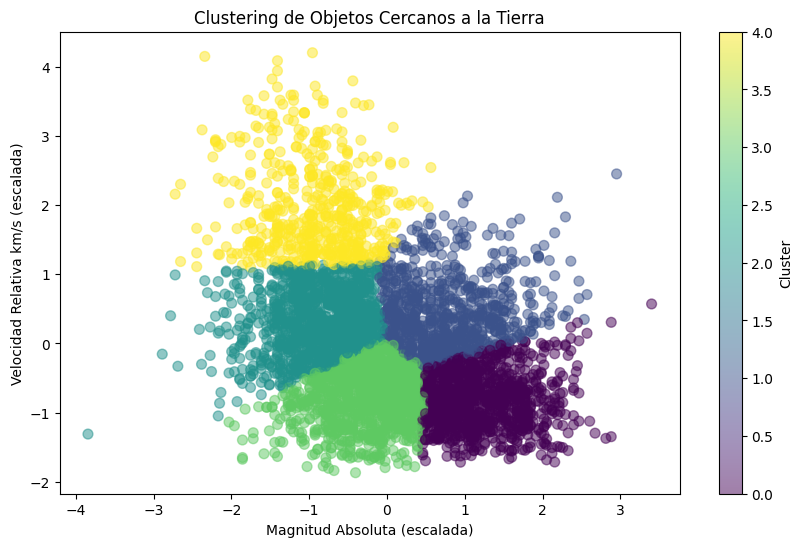

In [4]:
# Visualizar los resultados del clustering
plt.figure(figsize=(10, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Magnitud Absoluta (escalada)')
plt.ylabel('Velocidad Relativa km/s (escalada)')
plt.title('Clustering de Objetos Cercanos a la Tierra')
plt.colorbar(label='Cluster')
plt.show()

In [5]:
# Añadir la asignación de clusters al DataFrame
nasa_df['Cluster'] = clusters

In [6]:
# Calcular estadísticas descriptivas para cada cluster
cluster_summary = nasa_df.groupby('Cluster').agg({
    'Absolute Magnitude': ['mean', 'std'],
    'Relative Velocity km per sec': ['mean', 'std'],
    'Miss Dist.(Astronomical)': ['mean', 'std']
}).round(2)

print(cluster_summary)


        Absolute Magnitude       Relative Velocity km per sec        \
                      mean   std                         mean   std   
Cluster                                                               
0                    25.75  1.44                         7.94  2.81   
1                    24.51  1.61                        17.28  3.59   
2                    19.72  1.42                        16.28  3.08   
3                    21.47  1.32                         8.29  2.92   
4                    19.55  1.69                        28.19  4.90   

        Miss Dist.(Astronomical)        
                            mean   std  
Cluster                                 
0                           0.15  0.13  
1                           0.28  0.16  
2                           0.30  0.13  
3                           0.25  0.13  
4                           0.34  0.12  


In [9]:
kmeans.cluster_centers_

array([[ 1.20915404, -0.82226479],
       [ 0.77158819,  0.45635438],
       [-0.88158793,  0.31373666],
       [-0.27272847, -0.78064037],
       [-0.93777171,  1.94512032]])

In [28]:
features_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(features_new)

array([4, 1, 4, 4])

In [18]:
# Definición de las funciones de visualización
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(xx, yy, Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("'Magnitud Absoluta (escalada)'", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("Velocidad Relativa km/s (escalada)", fontsize=14)
    else:
        plt.tick_params(labelleft=False)

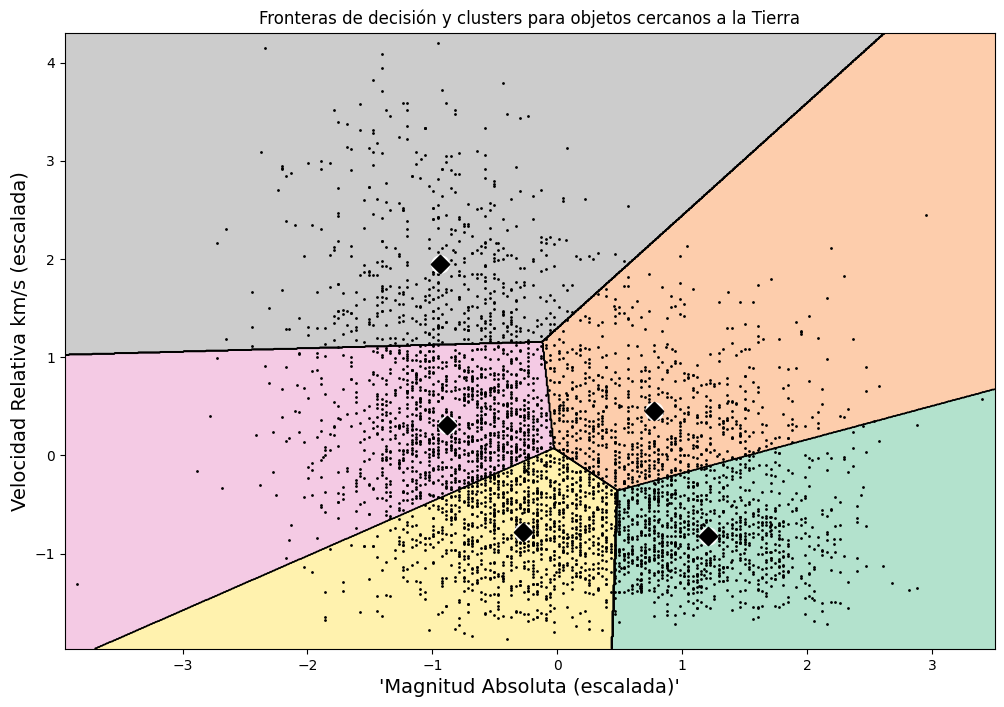

In [19]:
# Visualización de los resultados del clustering con fronteras de decisión
plt.figure(figsize=(12, 8))
plot_decision_boundaries(kmeans, features_scaled)
plt.title('Fronteras de decisión y clusters para objetos cercanos a la Tierra')
plt.show()

En lugar de asignar un grupo a cada muestra (*hard clustering*) se le puede asignar una puntuación (*soft clustering*) en función de su distancia al centroide.

In [29]:
kmeans.transform(features_new)

array([[3.07037979, 1.72574335, 1.9028088 , 2.79398312, 0.93937615],
       [3.34250023, 2.71084138, 4.23204547, 4.29449793, 3.93815411],
       [5.68565615, 4.5491769 , 3.42106423, 4.66167905, 2.31636712],
       [5.3623149 , 4.28968121, 3.04424327, 4.26621744, 2.13557416]])

Este algoritmo funciona asignando centroides de manera aleatoria y, de manera iterativa, asigna cada instancia a uno de ellos (el más cercano) tras lo cual se recalcula el centroide como el valor promedio de todas las instancias asignadas al grupo.


In [24]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=1, random_state=1)
# kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=2, random_state=1)
# kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
#                      algorithm="full", max_iter=3, random_state=1)


kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", max_iter=3, random_state=1)
kmeans_iter1.fit(features_scaled)
kmeans_iter2.fit(features_scaled)
kmeans_iter3.fit(features_scaled)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

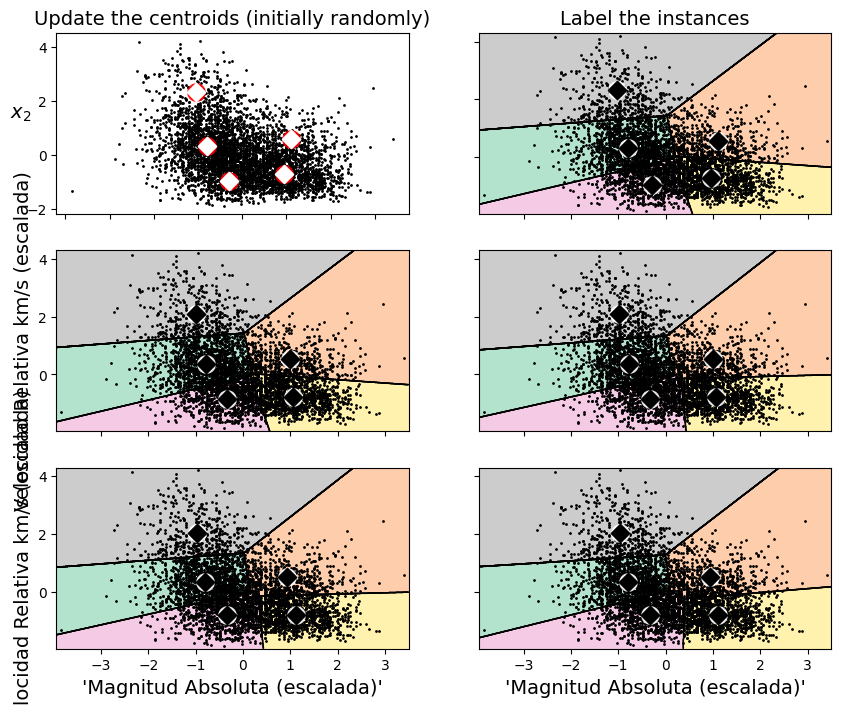

In [26]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(features_scaled)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, features_scaled, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, features_scaled, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, features_scaled, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, features_scaled, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, features_scaled, show_ylabels=False)

plt.show()

Esto implica que en función del estado inicial, el algoritmo puede llegar a una solución u otra.


In [38]:
def plot_clusterer_comparison(clusterer1, clusterer2, features_scaled, title1=None, title2=None):
    clusterer1.fit(features_scaled)
    clusterer2.fit(features_scaled)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, features_scaled)
    if title1:
        plt.title(title1, fontsize=10)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, features_scaled, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=10)

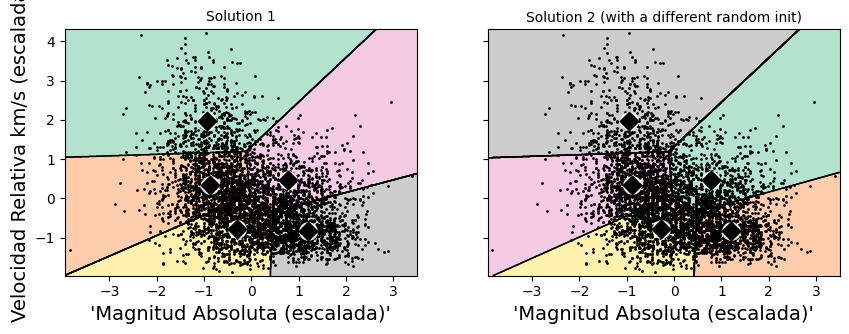

In [39]:
# kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd", max_iter=1, random_state=1)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, features_scaled,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

Para minimizar el impacto de la inicialización tenemos varias alternativas: probar varias y quedarnos con la mejor, o usar la inicialización inteligente que ofrece *Scikit-Learn* por defecto.


In [41]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="lloyd", random_state=11)
kmeans_rnd_10_inits.fit(features_scaled)

KMeans(init='random', n_clusters=5, n_init=10, random_state=11)

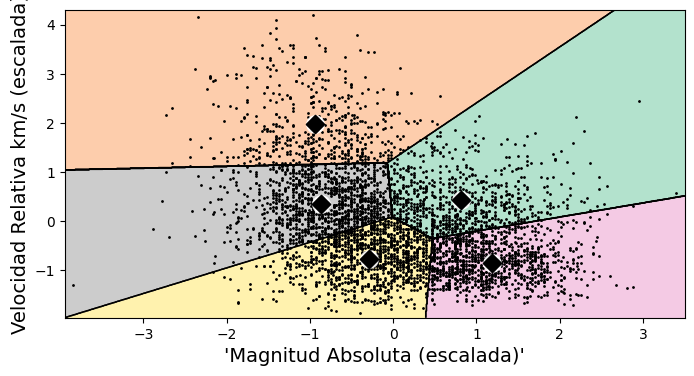

In [43]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, features_scaled)
plt.show()

### Encontrando el número óptimo de grupos

Como hemos visto anteriormente, el número de grupos o *clusters* es un hyperparámetro del modelo que debemos definir, y como podrás imaginar si nuestros datos no están etiquetados no será imposible saber qué valor usar. Para ello la solución se basa en usar diferentes valores y utilizar alguna métrica significativa. Una de estas métricas se conoce como el *silhouette score*, que se basa en calcular el coeficiente de silueta (*silhouette coefficient*) de todas las muestras del dataset como $(b-a)/\mathrm{max}(a,b)$ donde $a$ es la distancia mínima al resto de muestras del mismo grupo y $b$ es la distancia media de los grupos más cercanos. Su valor se encuentra entre $1$ y $-1$. Un valor cercano a $1$ indica que la muestra está bien metida en su grupo y lejos de los demás mientras que un valor cercano a $0$ indica que la muestra se encuentra cerca de una frontera de decisión y un valor cercano a $-1$ indica que la muestra está en el grupo incorrecto.


In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(features, kmeans.labels_)

0.2945691976505893

Calculando la métrica para diferentes números de *clusters* podemos encontrar el valor óptimo.


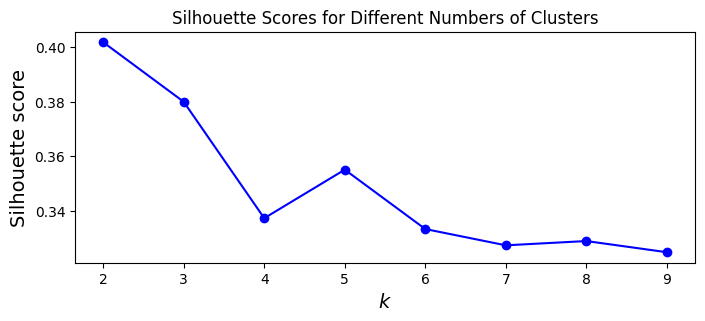

In [52]:
# Aplicar el algoritmo K-means para varios valores de k y calcular los scores de silueta
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(features_scaled)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(features_scaled, model.labels_)
                     for model in kmeans_per_k[1:]]

# Visualización de los scores de silueta
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.7])  # Ajusta los límites del eje si es necesario
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()

También es muy útil visualizar los diagramas de silueta, en el que visualizaremos todos los coeficientes de silueta ordenados por grupos y su valor.


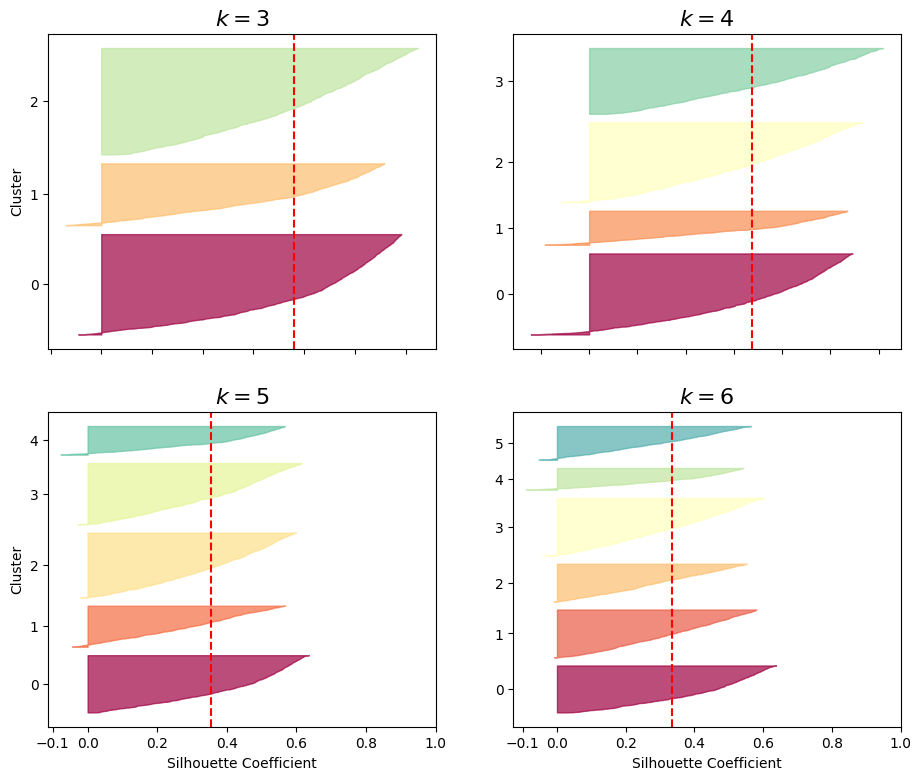

In [71]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    clusters = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(features_scaled, clusters)

    padding = len(features_scaled) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[clusters == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### K-Means para aprendizaje semi-supervisado.


El aprendizaje semi-supervisado (o *Semi-supervised Learning*) comprende el conjunto de técnicas que nos permiten entrenar modelos con datasets parcialmente etiquetados. En esta sección vamos a ver un ejemplo de como podemos aplicar esta técnica con el dataset MNIST y usando *K-Means*. Empezamos descargando el dataset.


In [72]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Suponiendo que features_scaled y nasa_df ya están definidos y cargados como antes
# y que 'clusters' es la variable de salida que quisieras predecir (o alguna otra que definas)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, nasa_df['Cluster'], test_size=0.2, random_state=42)


Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo $X$ y no $y$) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de *K-Means* con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas imágenes más representativas de cada grupo.


In [73]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)


In [76]:
# idxs = np.argmin(X_digits_dist, axis=0)
# X_representative_digits = X_train.values[idxs]

idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[idxs]


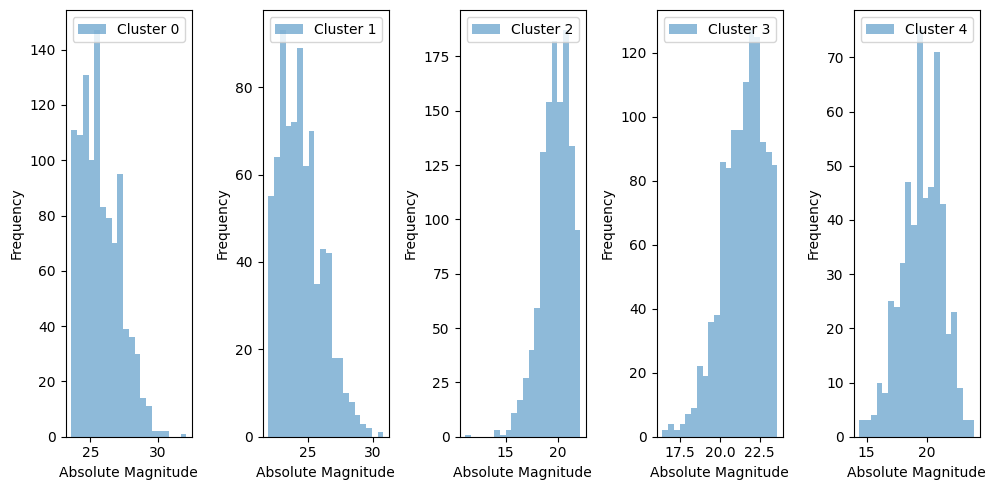

In [78]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un DataFrame 'nasa_df' y una variable 'clusters' que contiene las etiquetas de cluster para cada muestra
plt.figure(figsize=(10, 5))

# Número de clusters
num_clusters = 5
for i in range(num_clusters):
    # Seleccionar datos por cluster
    cluster_data = nasa_df[nasa_df['Cluster'] == i]

    # Crear un subplot para cada cluster
    plt.subplot(1, num_clusters, i + 1)
    plt.hist(cluster_data['Absolute Magnitude'], bins=20, alpha=0.5, label=f'Cluster {i}')
    plt.xlabel('Absolute Magnitude')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()


El siguiente paso consiste en anotar manualmente estas etiquetas (aquí haremos trampas ya que disponemos de dichas etiquetas :p).


In [79]:
y_representative_digits = y_train.values[idxs]

Y entrenaremos un clasificados usando estas imágenes representativas.


In [80]:
from sklearn.linear_model import LogisticRegression


log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)





CPU times: total: 0 ns
Wall time: 11 ms


0.9317697228144989

Como puedes observar hemos obtenido una precisión del $93%$ porciento.

In [81]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 4 ms


0.9541577825159915

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de imágenes. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [82]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [83]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 5.99 ms


0.9104477611940298

### Aprendizaje Activo


El aprendizaje activo (o *Active Learning*) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.


In [84]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.29400716, 0.30627706, 0.31841837, 0.31899465, 0.32224772,
       0.32598052, 0.33528448, 0.34287196, 0.34962931, 0.35939825])

In [87]:
# X_lowest = X_train[:1000][sorted_ixs[:k]]
# plt.figure(figsize=(10, 4))
# for index, img in enumerate(X_lowest):
#     plt.subplot(k // 10, 10, index + 1)
#     plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
#     plt.axis('off')
# plt.show()

In [88]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 3, 1, 1, 3, 3, 3, 1, 2, 3, 3,
       4, 4, 1, 4, 3, 3, 1, 1, 2, 0, 1, 3, 3, 1, 3, 3, 0, 0, 1, 1, 0, 0,
       1, 3, 1, 1, 0, 1])

In [89]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [90]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 5.52 ms


0.9307036247334755

Podemos repetir el proceso tantas veces como haga falta hasta llegar a las prestaciones requeridas.


## Otras técnicas de aprendizaje no supervisado
